## __Hypothesis Testing__

In [1]:
# Hypothesis to be tested: You believe that more students prefer pizza over
# other lunch option like burger or sandwiches

In [2]:
# Null hypothesis(H0): Students do not prefer pizza over other lunch options.
# Alternate hypothesis(H1): Students do prefer pizza over other lunch options.

In [3]:
import numpy as np

# Simulate the student preferences
# '1' for pizza and '0' for other options

np.random.seed(0) #For reproducibility

preference = np.random.choice([1,0], size=20,p=[0.75,0.25]) #60% pizza, 40% others

# Count how many prefer pizza
pizza_count = np.sum(preference == 1)

print(preference)
print(f"\n {pizza_count}")

[1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0]

 13


In [4]:
# simple decision based on our expectation

expected_pizza = 20*0.5 #we expect half of the student to prefer pizza

if pizza_count > expected_pizza:
    print("Our guess might be right! More student prefer pizza")
else:
    print("Our guess might be wrong! fewer student prefer pizza")

Our guess might be right! More student prefer pizza


In [5]:
# Example : Let's say we want to calculate a 95% confidence interval for the average 
# height of students in a school. 
# We randomly sample 50 students and measure their heights. 
# Here's how we can do it using Python.

In [6]:
import numpy as np
import scipy.stats as stats

# Step 1: Simulate sample data
np.random.seed(42)  # For reproducibility
sample_size = 50
# Simulate heights (in cm) from a normal distribution with mean=170 and std=10
sample_heights = np.random.normal(loc=170, scale=10, size=sample_size)

# Step 2: Calculate sample statistics
sample_mean = np.mean(sample_heights)
sample_std = np.std(sample_heights, ddof =1)   # Sample standard deviation

In [7]:
# Step 3:  Define Confidence Level and calculate z-score
confidence_level = 0.95
alpha = 1 - confidence_level

z_score = stats.norm.ppf(1-alpha/2)  #z-score for two tailed test

# Step 4: Calculate the margin of error
margin_of_error = z_score * (sample_std / np.sqrt(sample_size))

# Step 5: Calculate confidence interval
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

In [8]:
alpha

0.050000000000000044

In [9]:
print(f"Sample Mean: Average height of 50 Students: {sample_mean:.2f}")

Sample Mean: Average height of 50 Students: 167.75


In [10]:
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"Z-Score: {z_score:.2f}")

Sample Standard Deviation: 9.34
Z-Score: 1.96


In [11]:
print(f"Margin of Error: {margin_of_error:.2f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

Margin of Error: 2.59
95% Confidence Interval: (165.16, 170.33)


## __Z-Distribution (Standard Normal Distribution)__

In [12]:
# Greater than 30 data points
# Example: Basketball Perforamance
# Imagine you have data on the average points scored by the players in 
# your league and want to see how you compare

In [13]:
import numpy as np

# Example data: Points scored by players in a basketball league
points = [15,20,22,18,25,24,20,21,19,23]
your_score = 26

In [14]:
# Calculate mean and standard deviation

mean_points = np.mean(points)
print(f"Mean points: {mean_points}")
std_points = np.std(points)
print(f"\nStandard Deviation of points: {std_points:.2f}")

Mean points: 20.7

Standard Deviation of points: 2.83


In [15]:
# Calculate the z-score for your performance
z_score = (your_score - mean_points)/std_points
print(f"z-score: {z_score}")

z-score: 1.8726629213445694


In [16]:
## Positive z-score means that my score lies on right side of the mean. 
## This means my performance is better than the average performance.

## __T-Distribution__
# Less than 30 datapoints are available

## __T - Test__

In [17]:
# Null Hyposthesis (H0): There is no difference in average test score
# between the old and the new teaching methods

# Alternate Hypothesis (H1): The new teaching method leads to higher average 
# test scores compared to the old method

In [18]:
import numpy as np
from scipy import stats

# simulate test scores of two groups of students
np.random.seed(42) #For reproducibility

# Old methods score(mean = 70, std = 10)
old_method_score = np.random.normal(loc = 70, scale = 10, size = 30)
print(old_method_score)

# New Method score (mean = 75, std = 10)
new_method_score = np.random.normal(loc=75, scale=10, size=30)
print(new_method_score)

[74.96714153 68.61735699 76.47688538 85.23029856 67.65846625 67.65863043
 85.79212816 77.67434729 65.30525614 75.42560044 65.36582307 65.34270246
 72.41962272 50.86719755 52.75082167 64.37712471 59.8716888  73.14247333
 60.91975924 55.87696299 84.65648769 67.742237   70.67528205 55.75251814
 64.55617275 71.1092259  58.49006423 73.75698018 63.9936131  67.0830625 ]
[68.98293388 93.52278185 74.86502775 64.42289071 83.22544912 62.7915635
 77.08863595 55.40329876 61.71813951 76.96861236 82.3846658  76.71368281
 73.84351718 71.98896304 60.2147801  67.80155792 70.39361229 85.57122226
 78.4361829  57.36959845 78.24083969 71.1491772  68.23078    81.11676289
 85.30999522 84.31280119 66.60782477 71.90787624 78.31263431 84.75545127]


In [19]:
# Perform an independent t-test to compare the means of the group.
t_statistic, p_value = stats.ttest_ind(old_method_score, new_method_score)

# Print the result
print(f"new_method_score (first 5):{new_method_score[:5]}")
print(f"old_method_score (first 5): {old_method_score[:5]}")

print(f"t-statistic: {t_statistic:.2f}")
print(f"p-value: {p_value:.4f}")

new_method_score (first 5):[68.98293388 93.52278185 74.86502775 64.42289071 83.22544912]
old_method_score (first 5): [74.96714153 68.61735699 76.47688538 85.23029856 67.65846625]
t-statistic: -2.40
p-value: 0.0197


In [20]:
# Interpretation
alpha = 0.05 #Significance level

if p_value < alpha:
    print("The new teaching method is likely leads to higher test score compared to the old method")
else:
    print("There is no significant difference in test score between the new and old teaching methods")


The new teaching method is likely leads to higher test score compared to the old method


## __two-sample T-test__

In [21]:
import numpy as np
import scipy.stats as stats

In [22]:
# Data: Weight before and after the diet

before = np.array([85,78,92,88,95,78,84,91,79,87])
after = np.array([80,74,88,85,90,76,82,86,77,83])

# H0: The diet program affected weight loss
# H1: The diet program did not affect the weight loss

In [23]:
# Calculate the difference
difference = before-after

# Calculate the mean and Std of difference
mean_diff = np.mean(difference)
std_diff = np.std(difference, ddof=1) #ddof=delta degree of freedom
n = len(difference)

# Calculate the t-statistics
t_statistic = mean_diff/(std_diff / np.sqrt(n)) 

# Calculate the p-value(two tailed)
p_value = 2 * (1- stats.t.cdf(np.abs(t_statistic),df = n-1 ))

In [24]:
print(f"Mean difference: {mean_diff:.2f}\n")
print(f"Standard Deviation of difference: {std_diff:.2f}\n")
print(f"t-statistic: {t_statistic:.2f}\n")
print(f"p-value: {p_value:4f}\n")

Mean difference: 3.60

Standard Deviation of difference: 1.26

t-statistic: 9.00

p-value: 0.000009



In [25]:
alpha = 0.05

if p_value < alpha:
    print("Reject the H0, the diet program affected weight loss")
else:
    print("Fail to reject the H0, not enight evidence that diet program affected the weight loss")

Reject the H0, the diet program affected weight loss


## __Chi Square Distribution__

In [26]:
import numpy as np
from scipy.stats import chisquare

# observed frequecy from the survey
observed = np.array([50,60,40,50])

# Expected frequency if each category is equally prefered
expected = np.array([50,50,50,50])

In [27]:
# Performing Chi-Square test
chi2_statistic,p_value = chisquare(observed,expected)

In [28]:
# Print Result.
print(f"Chi-Square statistic: {chi2_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

Chi-Square statistic: 4.00
P-value: 0.2615


In [29]:
alpha=0.05

if p_value < alpha:
    print("Reject the H0: Customer prefer categorical products")
else:
    print("Failed to Reject the H0: The customer does not prefer categories")    

Failed to Reject the H0: The customer does not prefer categories


## __Anova: Analysis of Variance__

## One Way ANOVA

C:\Users\0litt\AppData\Local\Temp\ipykernel_7964\2601519081.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group_a,group_b,group_c], labels=['textbook','videos','exercises'])


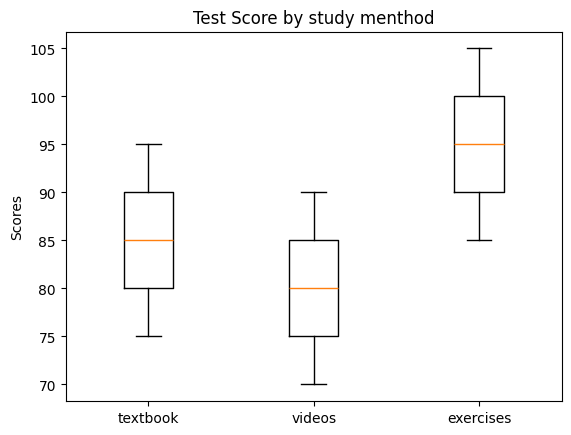

In [30]:
import matplotlib.pyplot as plt

# Data from the group

group_a= 75,80,85,90,95
group_b= 70,75,80,85,90
group_c= 85,90,95,100,105

# box plot
plt.boxplot([group_a,group_b,group_c], labels=['textbook','videos','exercises'])
plt.title('Test Score by study menthod')
plt.ylabel('Scores')
plt.show()

In [31]:
import numpy as np
from scipy.stats import f_oneway

# Scores of each group
group_a= 75,80,85,90,95
group_b= 70,75,80,85,90
group_c= 85,90,95,100,105

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(group_a,group_b,group_c)

print(f"F-Statistic: {f_statistic:.2f}")
print(f"p-value: {p_value:.4f}")

# Decision Based on P-value
alpha=0.05

if p_value < alpha:
    print("Reject the H0:  There is a significant difference in average score between at least two study methods")
else:
    print("Failed to reject the H0: There is no significance difference in average scores between the study methods")

F-Statistic: 4.67
p-value: 0.0317
Reject the H0:  There is a significant difference in average score between at least two study methods


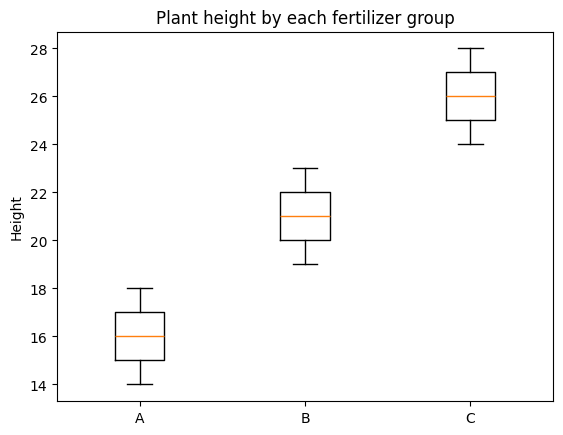

In [32]:
import matplotlib.pyplot as plt

# height of the plant for each fertilizer group
ferlilizer_a = [15,17,16,14,18]
ferlilizer_b = [20,22,19,21,23]
ferlilizer_c = [25,27,26,24,28]

# boxplot

plt.boxplot([ferlilizer_a,ferlilizer_b,ferlilizer_c], tick_labels=['A','B','C'])
plt.ylabel('Height')
plt.title("Plant height by each fertilizer group")
plt.show()

In [33]:
import numpy as np
from scipy.stats import f_oneway

# Plant height for each fertilizer
ferlilizer_a = [15,17,16,14,18]
ferlilizer_b = [20,22,19,21,23]
ferlilizer_c = [25,27,26,24,28]

# Calulating Chi Square test
f_statistic, p_value = f_oneway(ferlilizer_a,ferlilizer_b,ferlilizer_c)

print(f" F-Statistics: {f_statistic:.2f}")
print(f"P-Value: {p_value:.4f}")

alpha=0.05 #95% Confidence Interval

if p_value < alpha:
    print("Reject the H0:Atleast one fertilizer results in a different average plant height")
else:
    print("Failed to Reject the H0: Fertilizer does not have affect on the plant height")

 F-Statistics: 50.00
P-Value: 0.0000
Reject the H0:Atleast one fertilizer results in a different average plant height


In [34]:
Example 3: 
An investor wants to determine which of the three different strategies yeilds the highest annual returns.
The strategies are:
Strategy A (Stocks)
Strategy B (Bonds)
Strategy C (Real Estate)

SyntaxError: invalid syntax (871634310.py, line 1)

In [ ]:
import numpy as np
from scipy.stats import f_oneway

# Annual percentage return of each investment strategies
strategy_a = [8.2,9.1,10.5,11.3,7.8]
strategy_b = [4.5,4.8,5.0,4.7,4.6]
strategy_c = [12.3,13.0,11.8,14.2,12.8]

import matplotlib.pyplot as plt

# Plotting the returns based on Strategy
plt.boxplot([strategy_a,strategy_b,strategy_c], tick_labels = ['Stocks','Bonds','Real Estate'])
plt.title("Returns on Investment")
plt.ylabel("Annual Return")
plt.show()

In [ ]:
# /Calculating Chi Square test
f_statistic, p_value = f_oneway(strategy_a, strategy_b, strategy_c)

# Print Result
print(f" F-Statistics: {f_statistic:.2f}")
print(f"P-Value: {p_value:.4f}")

alpha=0.05 #95% Confidence Interval

# /Decision based on P-Value
if p_value < alpha:
    print("Reject the H0: There is difference in annual return using different strategies")
else:
    print("Failed to Reject the H0: No difference in annual return in all 3 strategies")

## Two Way ANOVA
The two-way ANOVA is an extension of the one-way ANOVA that allows you to investigate the effect of two independent variables(factors)
On the dependent variable, and also to see if there is any interaction between those tow independent variables.
This is perticualarly useful when you want to see how differnt groups or conditions affect a response and if the combination of factors leads to different outcomes. 

In [36]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create a DataFrame with the data

data = {
    'StudyMethod': ['Reading','Reading','Reading','Reading','Reading','Reading',
                   'Videos','Videos','Videos','Videos','Videos','Videos',
                   'Practice','Practice','Practice','Practice','Practice','Practice',],
    'Gender': ['Male','Male','Male','Female','Female','Female',
               'Male','Male','Male','Female','Female','Female',
               'Male','Male','Male','Female','Female','Female'],
    'TestScore': [85,78,92,88,90,86,
                 79,85,80,83,87,82,
                 90,94,89,92,95,91]
}

df = pd.DataFrame(data)
df

,StudyMethod,Gender,TestScore
0,Reading,Male,85
1,Reading,Male,78
2,Reading,Male,92
3,Reading,Female,88
4,Reading,Female,90
5,Reading,Female,86
6,Videos,Male,79
7,Videos,Male,85
8,Videos,Male,80
9,Videos,Female,83


In [37]:
# Fit the two-way ANOVA model
# ols = oridinary least square method
model = ols('TestScore ~ C(StudyMethod)+C(Gender) + C(StudyMethod):C(Gender)', data = df).fit()
anova_table =sm.stats.anova_lm(model, typ=2)

print(anova_table)

                              sum_sq    df         F    PR(>F)
C(StudyMethod)            254.333333   2.0  9.342857  0.003577
C(Gender)                  26.888889   1.0  1.975510  0.185223
C(StudyMethod):C(Gender)    1.444444   2.0  0.053061  0.948543
Residual                  163.333333  12.0       NaN       NaN


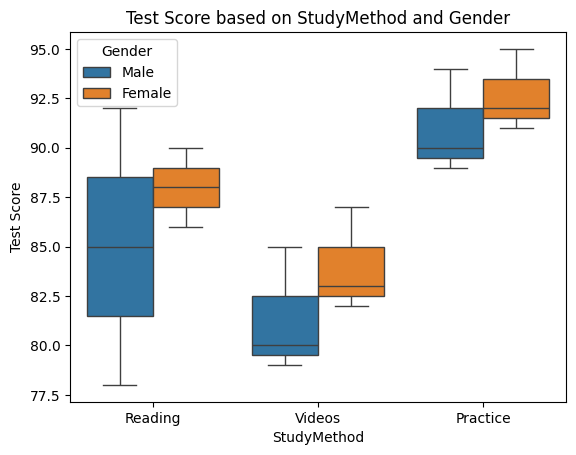

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a box plot to show the distribution of scores by study method and gender

sns.boxplot(x='StudyMethod', y='TestScore',hue= 'Gender', data=df)
plt.title('Test Score based on StudyMethod and Gender')
plt.ylabel('Test Score')
plt.show()

In [43]:
import pandas as pd
import statsmodels.formula.api as ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame with the data
data = {
    'production_method': ['manual','manual', 'automated','automated'],
    'packaging_type': ['standart','premium','standart','premium'],
    'quality_score': [75,80,85,90]
}

df = pd.DataFrame(data)
df

,production_method,packaging_type,quality_score
0,manual,standart,75
1,manual,premium,80
2,automated,standart,85
3,automated,premium,90


In [48]:
# Fit the two-way ANOVA model with interaction
model = ols('quality_score ~ C(production_method) * C(packaging_type)', data = df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

TypeError: 'module' object is not callable

## __F Distribution with F Test__

In [49]:
import numpy as np
from scipy.stats import f

# H0: There is no significance difference in variability between the teams.
# H1: There is significance difference in variability between the teams.    

# scores of basketball teams
team_a_scores = [80,85,90,95,100]
team_b_scores = [75,80,85,90,95]

# Calculate variances
variance_a = np.var(team_a_scores, ddof=1)
variance_b = np.var(team_b_scores, ddof=1)

# Calculate the F-ratio
f_ratio = variance_a / variance_b

# Degree of freedom
df1 = len(team_a_scores) - 1
df2 = len(team_b_scores) - 1

# Critical F-value for significance level 0.05
alpha = 0.05
f_critical = f.ppf(1-alpha, df1, df2)

# Print Results
print(f" Variance team A: {variance_a:.2f}")
print(f" Variance team B: {variance_b:.2f}")
print(f" F Ratio: {f_ratio:.2f}")
print(f" Critical F value {f_critical:.2f}")

 Variance team A: 62.50
 Variance team B: 62.50
 F Ratio: 1.00
 Critical F value 6.39


In [50]:
# Decision

if f_ratio > f_critical:
    print("Reject the null hypothesis: There is significance difference in variability between the team")
else:
    print("We failed to reject the null hypothesis: There is no significance difference in variability between the team")    

We failed to reject the null hypothesis: There is no significance difference in variability between the team


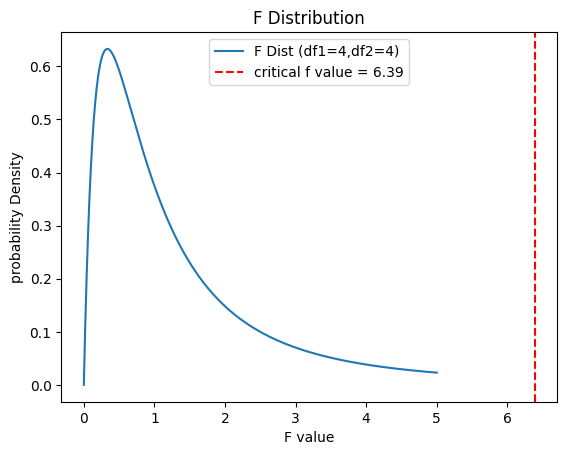

In [52]:
# Degree of Freedom of two groups
df1,df2 = 4,4

# Create a range of F-Values
x = np.linspace(0,5,1000)

# F Distribution
y= f.pdf(x,df1,df2)

# Plot the F distribution
plt.plot(x,y, label=f'F Dist (df1={df1},df2={df2})')
plt.axvline(x=f_critical, color='r', linestyle='--',label=f'critical f value = {f_critical:.2f}')
plt.title('F Distribution')
plt.xlabel('F value')
plt.ylabel('probability Density')
plt.legend()
plt.show()